In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import os

# define some random data that emulates your indeded code:
NCURVES = 8
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Blues_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=blues)

NCURVES = 10
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Greens_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap_g = cmx.ScalarMappable(norm=cNorm, cmap=blues)

params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 20,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "lines.linewidth": 3,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 0.1,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")


In [24]:
folder = "LGT_h=1_finite_mu"
correlators = {}
tr_correlators = {}
bl_correlators = {}
for qubits in ["7_qubits/", "9_qubits/", "15_qubits/", "19_qubits/"]:
    correlators[qubits] = {}
    bl_correlators[qubits] = {}
    tr_correlators[qubits] = {}
    for rbm in range(4):
        correlators[qubits][rbm] = []
        bl_correlators[qubits][rbm] = []
        tr_correlators[qubits][rbm] = []
        folder1 = folder+"/"+qubits
        with open(folder1+"/density_full_data_"+str(rbm)+".csv", "r") as f:
            lines = f.readlines()
        correlators[qubits][rbm].append(float(lines[-1].split(",")[int((len(lines[-1].split(","))-1)/2)]))
        with open(folder1+"/baseline_not_rotated/density_full_data_"+str(rbm)+".csv", "r") as f:
            lines = f.readlines()
        bl_correlators[qubits][rbm].append(float(lines[-1].split(",")[int((len(lines[-1].split(","))-1)/2)]))
        with open(folder1+"/target_density_full_data.csv", "r") as f:
            lines = f.readlines()
        tr_correlators[qubits][rbm].append(float(lines[-1].split(",")[int((len(lines[-1].split(","))-1)/2)]))
        with open(folder1+"/correlator_full_data_"+str(rbm)+".csv", "r") as f:
            lines = f.readlines()
        print(lines[-1].split(",")[1:])
        for i,c in enumerate(lines[-1].split(",")[:-1]):
            print(c)
            correlators[qubits][rbm].append(float(c))
        with open(folder1+"/baseline_not_rotated/correlator_full_data_"+str(rbm)+".csv", "r") as f:
            lines = f.readlines()
        print(lines[-1].split(",")[1:])
        for i,c in enumerate(lines[-1].split(",")[:-1]):
            print(c)
            bl_correlators[qubits][rbm].append(float(c))
        with open(folder1+"/target_correlator_full_data.csv", "r") as f:
            lines = f.readlines()
        for i,c in enumerate(lines[-1].split(",")[:-1]):
            print(c)
            tr_correlators[qubits][rbm].append(float(c))
print(correlators)
print(bl_correlators)    

['0.2370122414321037', '0.13845060599155987', '\n']
0.32220168212117106
0.2370122414321037
0.13845060599155987
['0.08763827510625818', '0.045625899195931865', '\n']
0.07284771058927385
0.08763827510625818
0.045625899195931865
0.32373499885045914
0.2884008684229146
0.1671592792343991
['0.21866252207469325', '0.14119446564452556', '\n']
0.29646676067870287
0.21866252207469325
0.14119446564452556
['0.09627211708087564', '0.04270508853998757', '\n']
0.07797561159356686
0.09627211708087564
0.04270508853998757
0.32373499885045914
0.2884008684229146
0.1671592792343991
['0.21985324795339925', '0.13113871924506443', '\n']
0.316009461515697
0.21985324795339925
0.13113871924506443
['0.09802843713705686', '0.04504941157305631', '\n']
0.06600862012893285
0.09802843713705686
0.04504941157305631
0.32373499885045914
0.2884008684229146
0.1671592792343991
['0.22626126816769607', '0.1287796124338475', '\n']
0.3155913057244847
0.22626126816769607
0.1287796124338475
['0.0775748795614523', '0.04228965268061

In [25]:
correlators_new = {}
tr_correlators_new = {}
bl_correlators_new = {}

for qubit in correlators.keys():
    correlators_new[qubit] = []
    tr_correlators_new[qubit] = []
    bl_correlators_new[qubit] = []
    for i in range(len(correlators[qubit][0])):
        c = []
        bl_c = []
        tr_c = []
        for rbm in correlators[qubit].keys():
            c.append(correlators[qubit][rbm][i])
            tr_c.append(tr_correlators[qubit][rbm][i])
            bl_c.append(bl_correlators[qubit][rbm][i])
        correlators_new[qubit].append((np.mean(c), np.std(c)))
        tr_correlators_new[qubit].append((np.mean(tr_c), np.std(tr_c)))
        bl_correlators_new[qubit].append((np.mean(bl_c), np.std(bl_c)))

C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


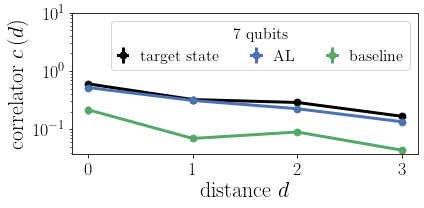

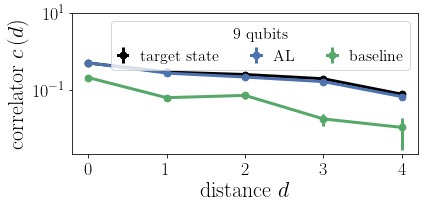

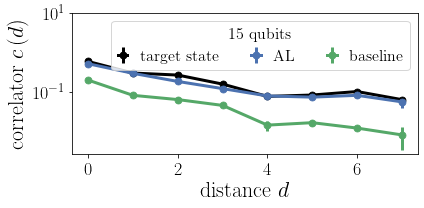

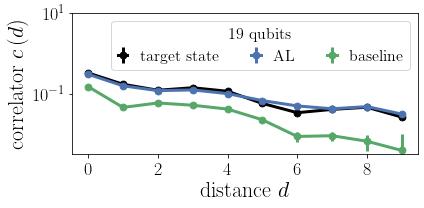

In [26]:
for qubits in ["7_qubits/", "9_qubits/", "15_qubits/", "19_qubits/"]:
    plt.figure(figsize=(6,3))
    plt.errorbar([i for i in range(len(correlators_new[qubits]))], [item[0] for item in tr_correlators_new[qubits]], [item[1] for item in tr_correlators_new[qubits]], color="black", markersize=7, label="target state")
    plt.errorbar([i for i in range(len(correlators_new[qubits]))], [item[0] for item in correlators_new[qubits]], [item[1] for item in correlators_new[qubits]], label="AL", markersize=7)
    plt.errorbar([i for i in range(len(correlators_new[qubits]))], [item[0] for item in bl_correlators_new[qubits]], [item[1] for item in bl_correlators_new[qubits]], label="baseline", markersize=7)
    plt.xlabel("distance $d$")
    plt.ylabel(r"correlator $c\left( d \right)$")
    plt.yscale('log')
    plt.ylim(0, 10)
    #plt.xscale('log')
    plt.legend(title = qubits.split("_")[0]+ " qubits", title_fontsize=16,fontsize=16, ncol=3, handlelength=0.6,loc="upper right")
    plt.tight_layout()
    plt.savefig(folder+"/"+folder+"_correlator_"+qubits.split("_")[0]+ "_qubits.pdf")
    plt.show()

In [6]:
densities = {}
bl_densities = {}
tr_densities = {}

for qubits in ["7_qubits/", "9_qubits/", "15_qubits/", "19_qubits/"]:
    densities[qubits] = {}
    bl_densities[qubits] = {}
    tr_densities[qubits] = {}
    for rbm in range(4):
        folder1 = folder+"/"+qubits
        with open(folder1+"/density_full_data_"+str(rbm)+".csv", "r") as f:
            lines = f.readlines()
        densities[qubits][rbm]=((lines[-1].split(","))[:-1])
        with open(folder1+"/baseline_not_rotated/density_full_data_"+str(rbm)+".csv", "r") as f:
            lines = f.readlines()
        bl_densities[qubits][rbm]=((lines[-1].split(","))[:-1])
        with open(folder1+"/target_density_full_data.csv", "r") as f:
            lines = f.readlines()
        tr_densities[qubits][rbm]=((lines[-1].split(","))[:-1])
print(densities)        

{'7_qubits/': {0: ['0.05399999999999999', '0.33399999999999996', '0.523', '0.526', '0.383', '0.09999999999999998'], 1: ['0.05199999999999999', '0.33799999999999997', '0.524', '0.492', '0.40800000000000003', '0.10299999999999998'], 2: ['0.061', '0.33799999999999997', '0.476', '0.545', '0.375', '0.10999999999999999'], 3: ['0.043999999999999984', '0.344', '0.541', '0.514', '0.395', '0.08800000000000002']}, '9_qubits/': {0: ['0.013000000000000012', '0.135', '0.368', '0.42', '0.508', '0.399', '0.21300000000000002', '0.04799999999999999'], 1: ['0.01200000000000001', '0.14500000000000002', '0.318', '0.462', '0.495', '0.28800000000000003', '0.176', '0.05099999999999999'], 2: ['0.013000000000000012', '0.14', '0.304', '0.48', '0.51', '0.29600000000000004', '0.183', '0.056999999999999995'], 3: ['0.010000000000000009', '0.14100000000000001', '0.312', '0.476', '0.507', '0.355', '0.21500000000000002', '0.055999999999999994']}, '15_qubits/': {0: ['0.11099999999999999', '0.486', '0.635', '0.4090000000

0.3333333333333333


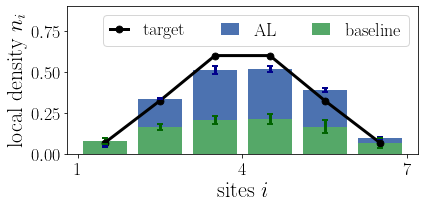

0.25000000000000144


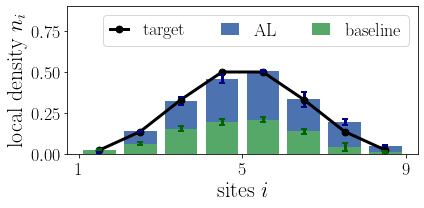

0.42857142857142877


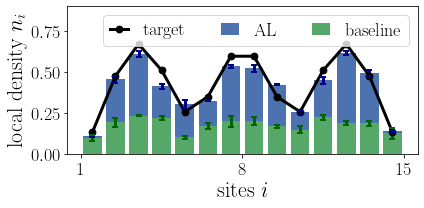

0.4444444443499377


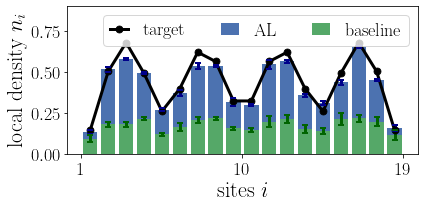

In [8]:

for qubits in ["7_qubits/", "9_qubits/", "15_qubits/", "19_qubits/"]:
    plt.figure(figsize=(6,3))
    all_values = []
    bl_all_values = []
    tr_all_values = []
    for qubit in range(int(qubits.split("_")[0])-1):
        values = []
        tr_values = []
        bl_values = []
        for rbm in range(4):
            values.append(float(densities[qubits][rbm][qubit]))
            bl_values.append(float(bl_densities[qubits][rbm][qubit]))
            tr_values.append(float(tr_densities[qubits][rbm][qubit]))
        #print(values)
        all_values.append((np.mean(values), np.std(values)))
        bl_all_values.append((np.mean(bl_values), np.std(bl_values)))
        tr_all_values.append((np.mean(tr_values), np.std(tr_values)))
    #print(all_values)
    plt.plot([it+0.5 for it in range(1,int(qubits.split("_")[0]))], [item[0] for item in tr_all_values], color="black", label = "target", markersize=7)
    plt.bar([it+0.5 for it in range(1,int(qubits.split("_")[0]))], [item[0] for item in all_values], yerr=[item[1] for item in all_values], error_kw=dict(ecolor="darkblue", lw=3, capsize=3,capthick=2), label = "AL")
    plt.bar([it+0.5 for it in range(1,int(qubits.split("_")[0]))], [item[0] for item in bl_all_values], yerr=[item[1] for item in bl_all_values], error_kw=dict(ecolor="darkgreen", lw=3, capsize=3,capthick=2), label = "baseline")
    
    print(np.mean([item[0] for item in tr_all_values]))
    plt.ylabel("local density $n_i$")
    plt.xlabel("sites $i$")
    plt.ylim(0,0.9)
    plt.legend(ncol=3, fontsize=18, handlelength=1)
    plt.xticks([1,int(int(qubits.split("_")[0])/2)+1,int(qubits.split("_")[0])])
    plt.tight_layout()
    plt.savefig(folder+"/"+folder+"_density_"+qubits.split("_")[0]+ "_qubits.pdf")
    plt.show()